# Comparison of RX-based anomaly detectors on synthetic and real hyperspectral data

Implementation of different rx methods based on an article which can be downloaded [here](https://avesis.hacettepe.edu.tr/yayin/0a23e8d7-011a-43d3-8fa0-6ae0b3ee7c7d/comparison-of-rx-based-anomaly-detectors-on-synthetic-and-real-hyperspectral-data/document.pdf).

## Import the necessary libraries

In [1]:
from rx import GRX, LRX, RX_UTD, DWRX, SSRX, KRX
import matplotlib.pyplot as plt
from generator import generate_data
from IPython.display import clear_output

In [2]:
def run_rx(func, image, plot=True):
    # Run rx function on the image and plot/return the result
    
    print(f'Run {func.__name__}')
    
    rx_score = func(image)
    clear_output(wait=True)
    
    if plot:
        plt.title(func.__name__)
        plt.imshow(rx_score, cmap='gray')
        plt.show()
    else:
        return rx_score

## Make Data Set

The dataset was created according to the paper:

- Two $10 \times 10$ anomalies were sampled from a normal distribution 
  $\mathcal{N}(1.5, 0.1)$.
- The background was sampled from a normal distribution 
  $\mathcal{N}(1, 0.1)$.
- There are $10$ channels, and each channel has a size of $75 \times 75$.


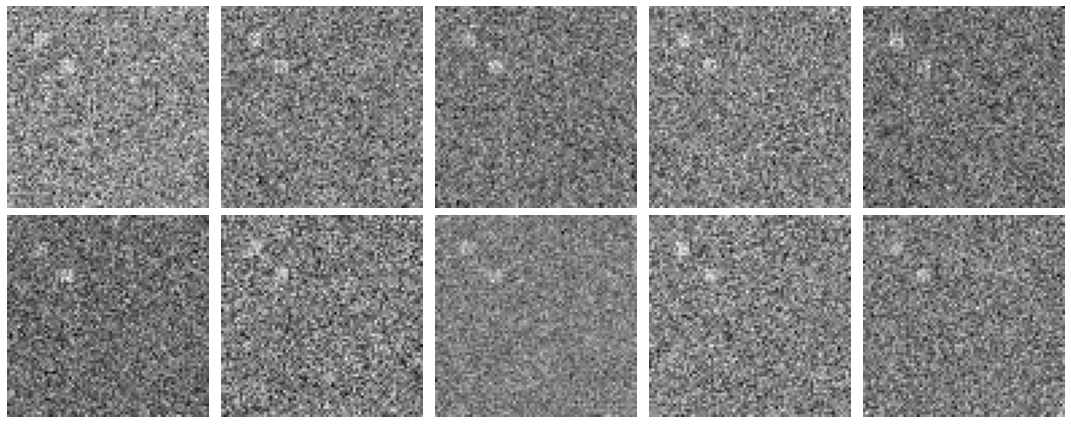

In [3]:
data = generate_data()

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

# Plot each image
for i in range(10):
    axs[i//5, i%5].imshow(data[:, :, i], cmap='gray')
    axs[i//5, i%5].axis('off')

plt.tight_layout()
plt.show()

## Plot the rx methods result
Plots for each method described in the paper are presented. For further detailed information, please refer to the paper.

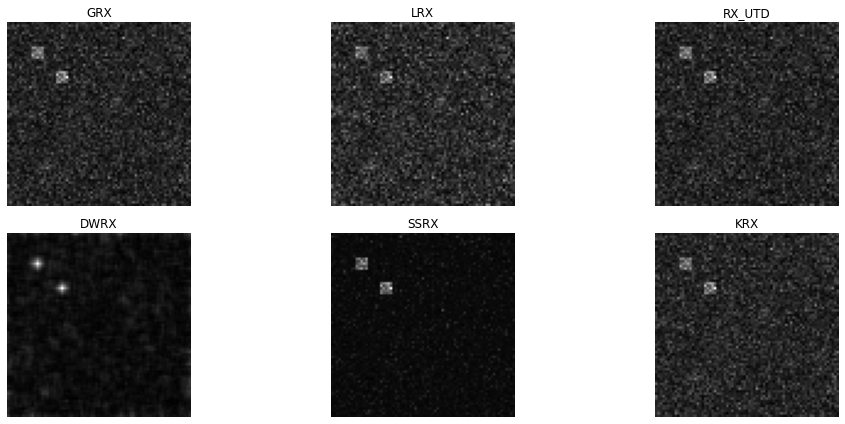

In [4]:
funcs = [GRX, LRX, RX_UTD, DWRX, SSRX, KRX]
fig, axs = plt.subplots(2, 3, figsize=(15, 6))

for i, func in enumerate(funcs):
    axs[i//3, i%3].imshow(run_rx(func, data, plot=False), cmap='gray')
    axs[i//3, i%3].set_title(func.__name__)
    axs[i//3, i%3].axis('off')

plt.tight_layout()
plt.show()

## Rx after NNMF channels reduction

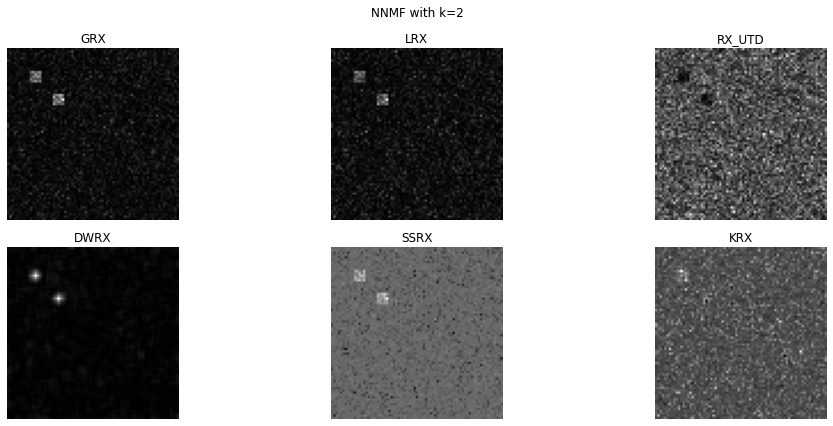

In [16]:
from nnmf import sklearn_nmf

data[data < 0] = 0

W = sklearn_nmf(image=data, k=3)

funcs = [GRX, LRX, RX_UTD, DWRX, SSRX, KRX]
fig, axs = plt.subplots(2, 3, figsize=(15, 6))

plt.suptitle('NNMF with k=2')

for i, func in enumerate(funcs):
    axs[i//3, i%3].imshow(run_rx(func, W, plot=False), cmap='gray')
    axs[i//3, i%3].set_title(func.__name__)
    axs[i//3, i%3].axis('off')

plt.tight_layout()
plt.show()